In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#тюнит параметры с помощью кросс-валидации
from sklearn.model_selection import GridSearchCV

In [64]:
from IPython.display import HTML
style = "<style>svg{width:70% !important; height:70% !important;}</style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv("~/data/titanic/train.csv")

In [5]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [8]:
#метод дерева не умеет работать со строковым типом, поэтому преобразуем их
X = pd.get_dummies(X)

In [9]:
#метод дерева не умеет работать с NaN, поэтому заменим их на медиану в столбце age
X = X.fillna({'Age' : X.Age.median()})

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

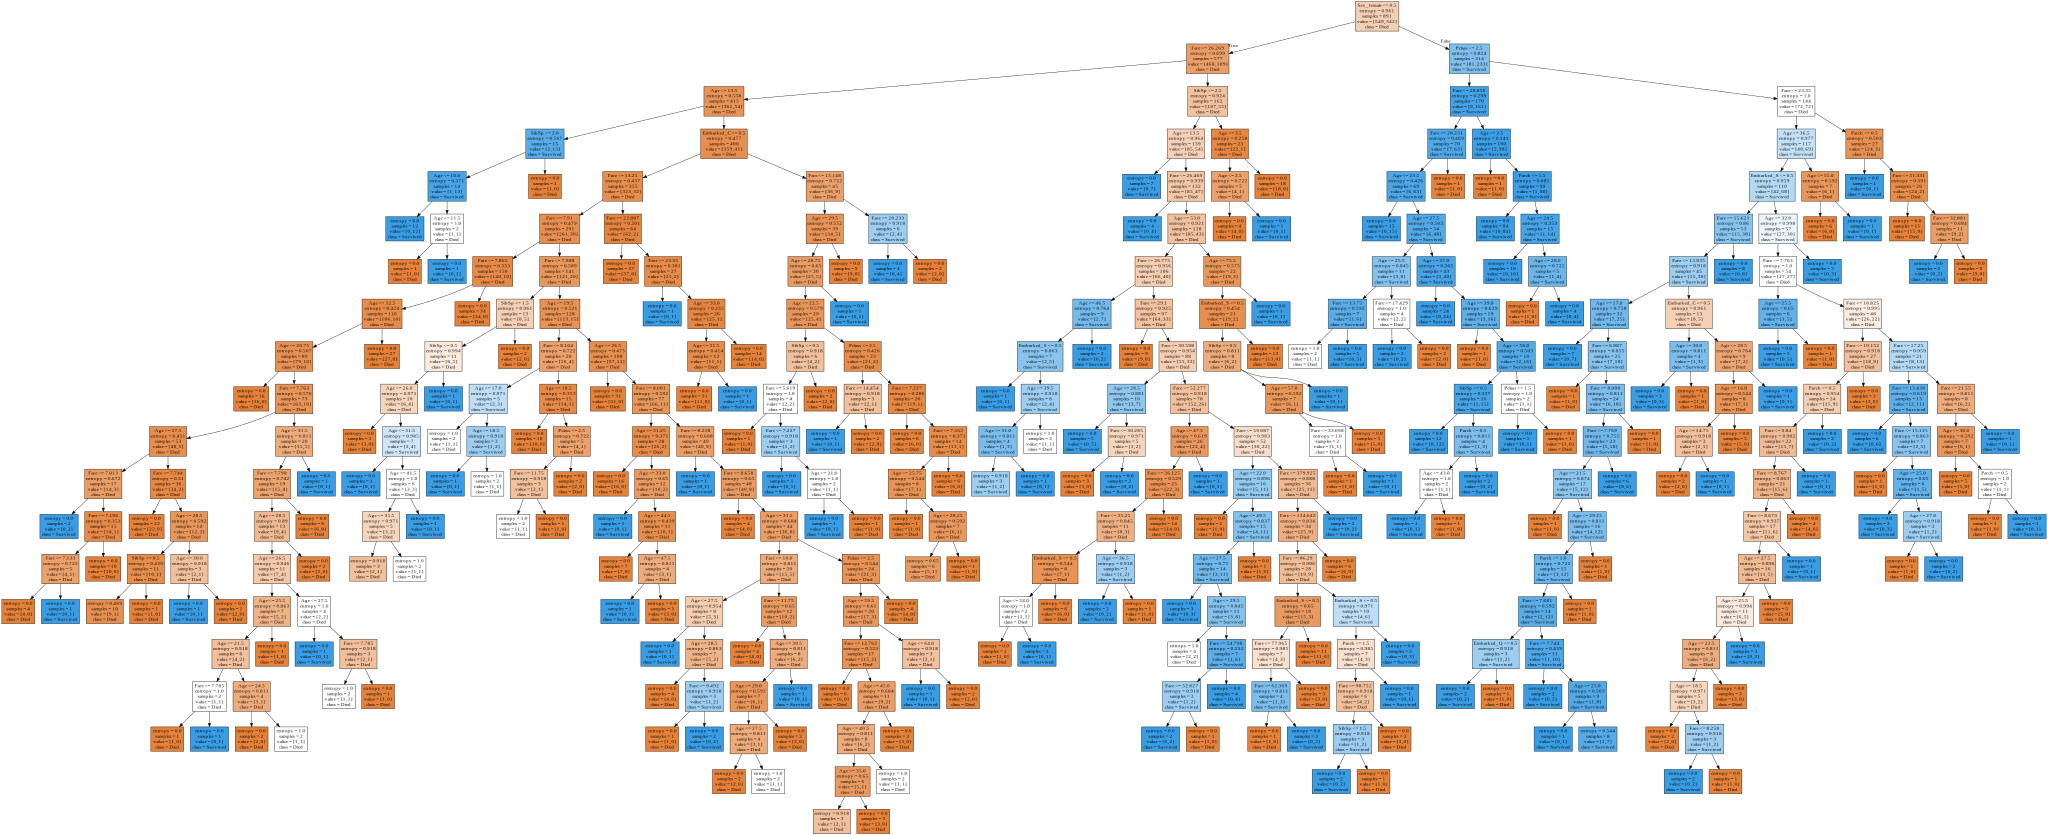

In [12]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [13]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
#сколько правильных ответов в итоге получаем после обучения модели
clf.score(X, y)

0.8226711560044894

In [19]:
clf.score(X_train, y_train)

0.8238255033557047

In [20]:
clf.score(X_test, y_test)

0.8203389830508474

In [21]:
max_depth_values = range(1, 100)

In [22]:
scores_data = pd.DataFrame()

In [31]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [32]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392


In [33]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')

In [34]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.771877
293,96,cross_val_score,0.776905
294,97,cross_val_score,0.768501
295,98,cross_val_score,0.776891


In [35]:
scores_data_long.query("set_type == 'cross_val_score'")

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
...,...,...,...
292,95,cross_val_score,0.771877
293,96,cross_val_score,0.776905
294,97,cross_val_score,0.768501
295,98,cross_val_score,0.776891


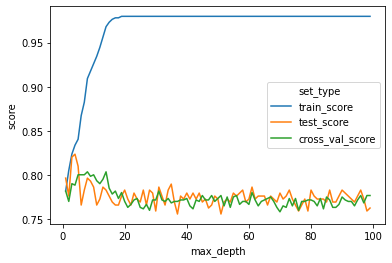

In [36]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [37]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [38]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [39]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [41]:
clf = tree.DecisionTreeClassifier()

In [42]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [43]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [44]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [45]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [46]:
#лучшее дерево
best_clf = grid_search_cv_clf.best_estimator_

In [47]:
#точность
best_clf.score(X_test, y_test)

0.7932203389830509

In [48]:
from sklearn.metrics import precision_score, recall_score

In [49]:
y_pred = best_clf.predict(X_test)

In [50]:
#метрика точнсти
precision_score(y_test, y_pred)

0.8172043010752689

In [51]:
#метрика полноты
recall_score(y_test, y_pred)

0.6333333333333333

In [52]:
#предсказанные вероятности отнесения к одному из двух классов
y_predicted_prob = best_clf.predict_proba(X_test)

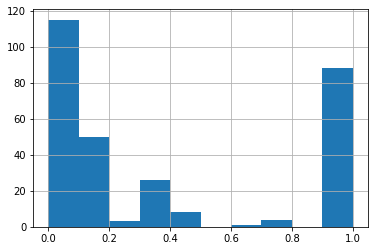

In [53]:
#оставили только вторую колонку(вероятность выжить)
#по оси X вероятность выжить, по оси Y количество
pd.Series(y_predicted_prob[:, 1]).hist()

In [54]:
#по умолчанию к 1 относятся вероятности > 0.5
#тут мы увеличиваем пороговое значени вероятности до 0.8
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [55]:
precision_score(y_test, y_pred)

0.8295454545454546

In [56]:
recall_score(y_test, y_pred)

0.6083333333333333

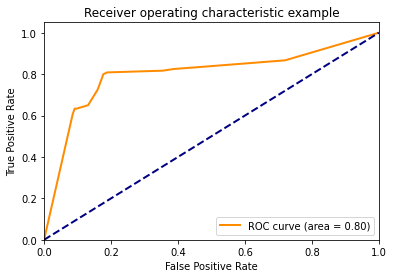

In [57]:
#ROC-кривая
#По оси Y - recall какой процент реально выживших пассажиров мы квалифицировали, как выживших
#По оси X - какой процент реально не выживших пассажиров мы квалифицировали, как выживших
#По линии идут пороговый значения вероятностей
#в точке (1, 1) - значений вероятности = 0
#в точке (0, 0) - значение вероятности = 1
#Это AUC (area under ROC curve), чем больше площадь под кривой, тем лучше работает соответсвующий классификатор
from sklearn.metrics import roc_curve, auc
lw = 2
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [68]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [69]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

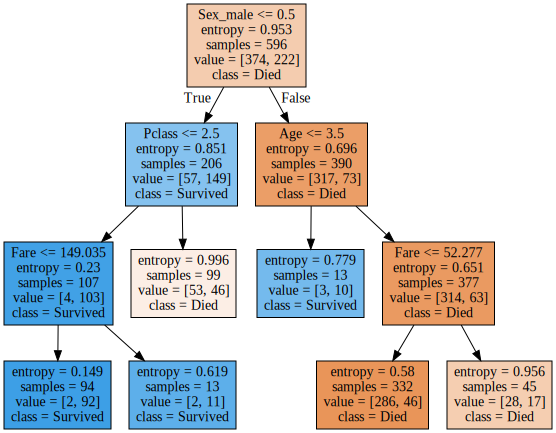

In [70]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))